#  Frequency analysis of M&S support chats

#### To do:
- find minimum DF to kill typos and names

### Import chats

In [1]:
input_file_name = '04_doc2vecTrainingDataFiltered'

import config_project as cfg
input_file_path = cfg.data_dir + "/" + input_file_name + ".txt"

import codecs
chats = codecs.open(input_file_path,'r','utf-8')

### Document frequency analysis

In [2]:
import frequency_tools
document_frequencies = frequency_tools.get_DF_histogram(chats)

### Term Frequency - Inverse Document frequency analysis

In [3]:
# rewind chats file
chats.seek(0)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

#vectorizer = TfidfVectorizer(min_df=0.1)
tfidf_matrix = tfidf_vectorizer.fit_transform(chats)

tfidf_means = tfidf_matrix.mean(axis=0).transpose()
tfidf_words = tfidf_vectorizer.get_feature_names()
tfidf_dict  = {}
for i, tfidf_mean in enumerate(tfidf_means):
    tfidf_dict[tfidf_words[i]] = tfidf_mean
    
import statistics
tfidf_median =statistics.median(tfidf_means).mean()
print('tfidf_median = ' + str(tfidf_median))

tfidf_median = 1.4469968129e-05


In [4]:
tfidf_median.mean()

1.4469968129001394e-05

### Document frequency histogram

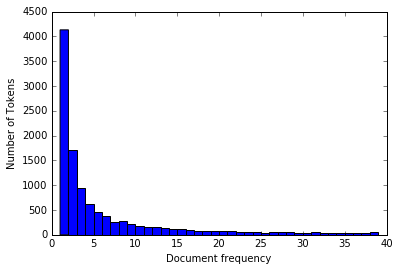

In [5]:
from matplotlib.pylab import plt
%matplotlib inline  
plt.hist(document_frequencies.values(),bins=range(1,40))
plt.xlabel('Document frequency')
plt.ylabel('Number of Tokens')

### Term Frequency - Inverse Document frequency histogram

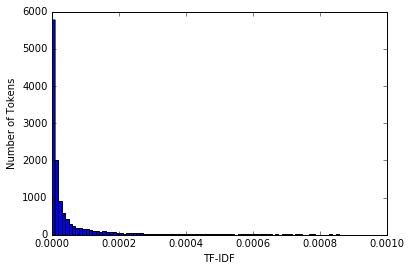

In [6]:
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline  
plt.hist(tfidf_means,bins = np.linspace(0.0, 0.001, num=100))
plt.xlabel('TF-IDF')
plt.ylabel('Number of Tokens')

### Check words with a given DF value

In [ ]:
df_value = 4
tokens = document_frequencies.keys()

for i,df in enumerate(document_frequencies.values()):
    if df == df_value:
        tfidf = tfidf_dict[tokens[i]]
        print 'word = ' + tokens[i] + ', DF = '+str(df) + ', TF-IDF = '+str(tfidf)
        raw_input()

In [ ]:
chats.close()